<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/TSP_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial (random) distance: 5975.649m
Solution: 3415.765m


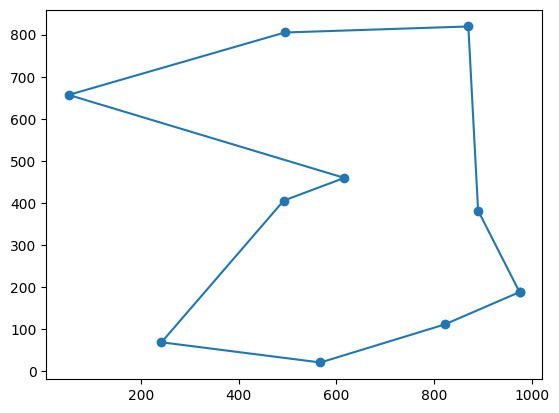

In [1]:
from random import random
from random import shuffle
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt


# (x,y) these are the coordinates on the plane
class City:

    def __init__(self):
        # horizontal dimension for a point
        self.x = 1000 * random()
        # vertical dimension for a point
        self.y = 1000 * random()

    def __repr__(self):
        return '(%s,%s)' % (round(self.x, 1), round(self.y, 1))


class SingleTour:

    def __init__(self):
        self.tour = []

    def set_tour(self, tour):
        self.tour.extend(tour)

    def swap(self, index1, index2):
        self.tour[index1], self.tour[index2] = self.tour[index2], self.tour[index1]

    # this is the fitness function (cost function)
    # we the lower this value the better the configuration
    def get_distance(self):
        tour_distance = 0

        for i in range(len(self.tour)):
            tour_distance += self.distance(self.tour[i % len(self.tour)],
                                           self.tour[(i + 1) % len(self.tour)])

        return tour_distance

    @staticmethod
    def distance(city1, city2):

        dist_x = abs(city1.x - city2.x)
        dist_y = abs(city1.y - city2.y)

        return np.sqrt(dist_x * dist_x + dist_y * dist_y)

    def generate_tour(self, n):
        for _ in range(n):
            self.tour.append(City())

        shuffle(self.tour)

    def get_tour_size(self):
        return len(self.tour)

    def __repr__(self):
        return ''.join(str(e) for e in self.tour)


class SimulatedAnnealing:

    # if the cooling rate is large - we consider just a few states in the search space
    # the cooling rate controls the number of states the algorithm will consider
    def __init__(self, num_cities, min_temp, max_temp, cooling_rate=0.01):
        self.num_cities = num_cities
        self.min_temp = min_temp
        self.max_temp = max_temp
        self.cooling_rate = cooling_rate
        self.actual_state = SingleTour()
        self.next_state = None
        self.best_state = None

    def run(self):
        self.actual_state.generate_tour(self.num_cities)
        print('Initial (random) distance: %sm' % round(self.actual_state.get_distance(), 3))

        self.best_state = self.actual_state
        temp = self.max_temp

        while temp > self.min_temp:
            # generate the neighboring state
            new_state = self.generate_random_state(self.actual_state)

            # calculate the energies (distances)
            actual_energy = self.actual_state.get_distance()
            new_energy = new_state.get_distance()

            if random() < self.accept_prob(actual_energy, new_energy, temp):
                single_tour = SingleTour()
                single_tour.set_tour(new_state.tour)
                self.actual_state = single_tour

            if self.actual_state.get_distance() < self.best_state.get_distance():
                single_tour = SingleTour()
                single_tour.set_tour(self.actual_state.tour)
                self.best_state = single_tour

            temp *= 1 - self.cooling_rate

        print('Solution: %sm' % round(self.best_state.get_distance(), 3))

    @staticmethod
    def generate_random_state(actual_state):
        new_state = SingleTour()
        new_state.set_tour(actual_state.tour)
        # we have to swap 2 cities at random
        random_index1 = randint(0, new_state.get_tour_size())
        random_index2 = randint(0, new_state.get_tour_size())

        new_state.swap(random_index1, random_index2)

        return new_state

    def plot_solution(self):
        xs = []
        ys = []

        self.best_state.tour.append(self.best_state.tour[0])

        for city in self.best_state.tour:
            xs.append(city.x)
            ys.append(city.y)

        # these are the cities (points)
        plt.scatter(xs, ys)
        # we connect the cities (and plot the shortest hamiltonian cycle)
        plt.plot(xs, ys)
        plt.show()

    @staticmethod
    def accept_prob(actual_energy, next_energy, temp):

        if next_energy < actual_energy:
            return 1

        return np.exp((actual_energy - next_energy) / temp)


if __name__ == '__main__':
    algorithm = SimulatedAnnealing(10, 1e-5, 100000)
    algorithm.run()
    algorithm.plot_solution()
